In [114]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [137]:
img = cv.imread('1.png', cv.IMREAD_UNCHANGED)
part = cv.imread('train2.png', cv.IMREAD_UNCHANGED)

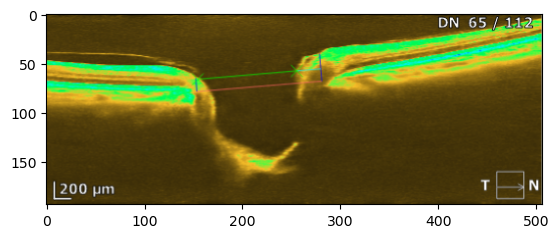

In [116]:
plt.imshow(img)

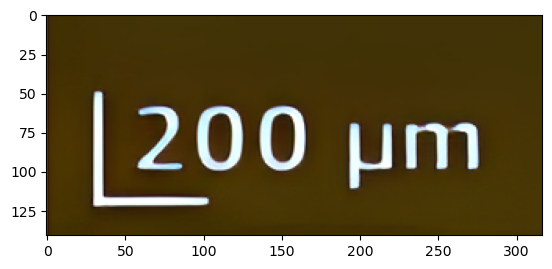

In [117]:
plt.imshow(part)

In [118]:
print(f"img data type: {img.dtype}")
print(f"part data type: {part.dtype}")
print(f"img dimensions: {img.ndim}")
print(f"part dimensions: {part.ndim}")


img data type: uint8
part data type: uint8
img dimensions: 3
part dimensions: 3


In [119]:
# Convert images to grayscale (2D) if necessary
if img.ndim > 2:
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
if part.ndim > 2:
    part = cv.cvtColor(part, cv.COLOR_BGR2GRAY)

# Convert images to the required data type (CV_8U or CV_32F)
if img.dtype != np.uint8 and img.dtype != np.float32:
    img = img.astype(np.float32)  # Change data type as needed
if part.dtype != np.uint8 and part.dtype != np.float32:
    part = part.astype(np.float32)  # Change data type as needed


In [120]:
# There are 6 comparison methods to choose from:
# TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR, TM_CCORR_NORMED, TM_SQDIFF, TM_SQDIFF_NORMED
# You can see the differences at a glance here:
# https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html
result = cv.matchTemplate(img, part, cv.TM_CCOEFF_NORMED)

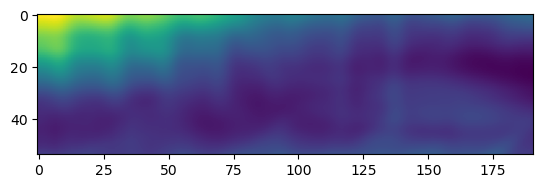

In [121]:
plt.imshow(result)

### Get Max Result

In [122]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

In [123]:
max_loc

(6, 1)

In [124]:
max_val

0.1656101644039154

In [125]:
w = wheat_img.shape[1]
h = wheat_img.shape[0]

In [126]:
cv.rectangle(farm_img, max_loc, (max_loc[0] + w, max_loc[1] + h), (0,255,255), 2)

array([[[188, 184, 176],
        [200, 197, 189],
        [200, 197, 189],
        ...,
        [205, 201, 189],
        [204, 200, 189],
        [151, 149, 144]],

       [[ 90,  74,  29],
        [ 83,  64,  10],
        [ 85,  65,  11],
        ...,
        [ 80,  61,  10],
        [ 80,  61,  10],
        [120, 110,  83]],

       [[ 89,  73,  29],
        [ 81,  62,  10],
        [ 84,  64,  11],
        ...,
        [ 80,  61,  10],
        [ 81,  61,  10],
        [121, 111,  83]],

       ...,

       [[ 82,  68,  28],
        [ 71,  55,   9],
        [ 72,  55,   9],
        ...,
        [ 83,  63,  10],
        [ 80,  61,  10],
        [118, 109,  83]],

       [[ 82,  68,  28],
        [ 73,  55,   9],
        [ 75,  58,   9],
        ...,
        [ 81,  61,  10],
        [ 79,  60,   9],
        [117, 108,  82]],

       [[ 82,  68,  28],
        [ 70,  54,   9],
        [ 71,  54,   8],
        ...,
        [ 81,  61,  11],
        [ 73,  56,   9],
        [114, 106,  82]]

In [127]:
threshold = .16

In [128]:
yloc, xloc = np.where(result >= threshold)

In [129]:
len(xloc)

14

In [130]:
for (x, y) in zip(xloc, yloc):
    cv.rectangle(img, (x, y), (x + w, y + h), (0,255,255), 2)

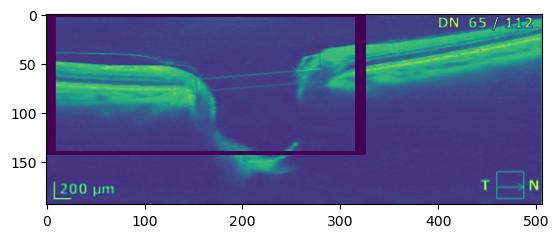

In [131]:
plt.imshow(img)

In [132]:
# What is a rectangle?
# x, y, w, h
rectangles = []
for (x, y) in zip(xloc, yloc):
    rectangles.append([int(x), int(y), int(w), int(h)])
    rectangles.append([int(x), int(y), int(w), int(h)])

In [133]:
len(rectangles)

28

In [134]:
rectangles, weights = cv.groupRectangles(rectangles, 1, 0.2)

In [135]:
rectangles

array([[  4,   1, 317, 141]])

In [138]:
len(rectangles)

1

In [139]:
for (x, y, w, h) in rectangles:
    cv.rectangle(img, (x, y), (x + w, y + h), (0,255,255), 2)

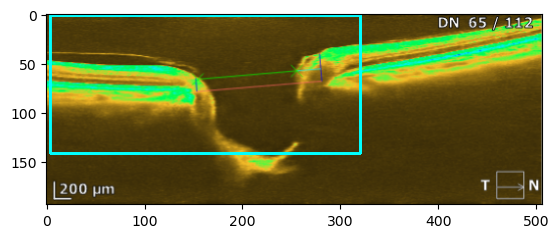

In [140]:
plt.imshow(img)